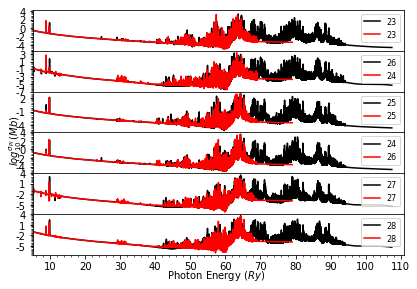

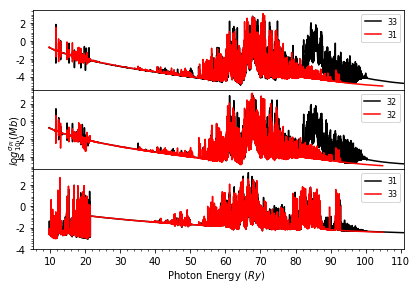

In [3]:
#This script is to plot the n3 and n4 mismatch

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator
from numpy import log10

def setup(ax, indx, column_n3,  re_match, my_num_ticks, match = True):
	indx_n3 = indx
	indx_n4 = indx
	
	data_n3 = [[], []]
	data_n4 = [[], []]
	
	for line in open('mismatch_n3_' + str(indx_n3) + '_data'):
		data_line = line.split()
		data_n3[0].append(float(data_line[0]))
		data_n3[1].append(float(data_line[column_n3]))
	if match:
		try:
			indx_n4 = re_match[indx]	
		except:
			pass
	for line in open('mismatch_n4_' + str(indx_n4) + '_data'):
		data_line = line.split()
		data_n4[0].append(float(data_line[0]))
		data_n4[1].append(float(data_line[1]))	
	
	ax.semilogy(data_n4[0], data_n4[1], 'k', label = str(indx_n4))
	
	ax.semilogy(data_n3[0], data_n3[1], 'r', label = str(indx_n3))
	
	ax.legend(loc = 1, prop = {'size': 8}, frameon=True)	
	
	ax.yaxis.set_major_locator(LogLocator(base = 10, numticks = my_num_ticks))
	ax.set_yticklabels(ax.get_yticks())
	labels = [str(int(log10(float(label.get_text())))) for label in ax.get_yticklabels()]
	ax.set_yticklabels(labels)
	ax.yaxis.set_minor_locator(LogLocator(base = 10, subs = (0.2, 0,4, 0.6, 0.8), numticks = 14))
	
	ax.xaxis.set_minor_locator(AutoMinorLocator(5))
	ax.set_xticks(range(0, 111, 10))
	ax.set_xticklabels([])
	ax.set_xlim(5, 111)
	
#====================== MAIN ============================
if __name__ == '__main__':
	#======================= Fe XVII ====================
	fig_1, axes_1 = plt.subplots(6, 1)
	
	for i in range(23, 29):
		setup(axes_1[i-23], i, 3, {24:26, 26:24}, 5, match=True)
	
	axes_1[5].set_xticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110'])
	fig_1.text(0.4, 0.02, 'Photon Energy ($Ry$)')
	#axes_1[5].set_xlabel('Photon Energy ($Ry$)', fontsize=14)
	fig_1.text(0.05, 0.5, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha = 'center', va = 'center', rotation = 90)
	
	fig_1.subplots_adjust(hspace=0, left = 0.09, right = 0.95, bottom = 0.10, top = 0.95)
	
	#========================= Fe XVIII =========================
	fig_2, axes_2 = plt.subplots(3, 1)
	
	for i in range(31, 34):
		setup(axes_2[i-31], i, 1, {31:33, 33:31}, 7, match=True)
	axes_2[2].set_xticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110'])
	fig_2.text(0.4, 0.02, 'Photon Energy ($Ry$)')
	#axes_1[5].set_xlabel('Photon Energy ($Ry$)', fontsize=14)
	fig_2.text(0.05, 0.5, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha = 'center', va = 'center', rotation = 90)
	fig_2.subplots_adjust(hspace=0, left = 0.09, right = 0.95, bottom = 0.12, top = 0.95)
	#======= correction ========
	#reset the yticklabels for the last plot because of the overlap between the labels.
	axes_1[2].set_yticks([1e-4, 1e-1, 1e2])
	axes_1[2].set_yticklabels(['-4', '-1', '2', '2', ''])
	
	axes_2[2].set_yticks([1e-4, 1e-2, 1e0, 1e2])
	axes_2[2].set_yticklabels(['-4', '-2', '0', '2', ''])

	plt.show()